<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/analytics_olympiad_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
# Importing libraries needed for the program
import pandas as pd
import numpy as np
import os
from pandas_profiling import ProfileReport

In [ ]:
# Reading data source files
train = pd.read_csv('/content/drive/MyDrive/datasets/analytics-olympiad/train.csv')
val = pd.read_csv('/content/drive/MyDrive/datasets/analytics-olympiad/test.csv')

In [ ]:
# Data Analysis & Visualization
# ProfileReport(train)

In [ ]:
train.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [ ]:
val.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
objList = train.select_dtypes(include = "object").columns
le = LabelEncoder()
for feat in objList:
    train[feat] = le.fit_transform(train[feat].astype(str))
    val[feat] = le.fit_transform(val[feat].astype(str))

In [ ]:
train['VEHICLE_OWNERSHIP']=train['VEHICLE_OWNERSHIP'].astype('int')
train['MARRIED']=train['MARRIED'].astype('int')
train['CHILDREN']=train['CHILDREN'].astype('int')
train['OUTCOME']=train['OUTCOME'].astype('int')
train.drop('POSTAL_CODE',axis=1,inplace=True)
train.drop('ID',axis=1,inplace=True)
train.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,2,0,2,2,0,0.638050,0,0,0,0,11000.0,0,0,0,0,3
1,1,1,2,0,0,0.475741,1,1,1,0,9000.0,0,0,0,1,0
2,2,1,2,1,0,0.839817,1,1,1,1,12000.0,0,0,0,1,2
3,2,1,2,0,2,0.682527,1,1,0,1,6000.0,1,0,0,1,2
4,2,0,2,1,3,0.572184,1,0,1,1,15000.0,0,0,1,0,2


In [ ]:
val['VEHICLE_OWNERSHIP']=val['VEHICLE_OWNERSHIP'].astype('int')
val['MARRIED']=val['MARRIED'].astype('int')
val['CHILDREN']=val['CHILDREN'].astype('int')
val.drop('POSTAL_CODE',axis=1,inplace=True)
val.drop('ID',axis=1,inplace=True)
val.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,2,1,1,1,3,0.814707,1,0,0,1,10000.0,0,0,0,0
1,1,0,2,0,2,0.344051,1,1,0,0,13000.0,0,0,0,2
2,2,1,1,1,2,0.620691,0,0,1,0,12000.0,0,0,0,1
3,1,1,2,0,2,0.689658,1,0,1,1,16000.0,1,0,0,1
4,3,1,1,1,0,0.755666,0,0,0,1,14000.0,2,0,0,0


In [ ]:
# Split data into train & test

In [ ]:
train['ANNUAL_MILEAGE'] = (train['ANNUAL_MILEAGE'] - train['ANNUAL_MILEAGE'].mean()) / train['ANNUAL_MILEAGE'].std()
val['ANNUAL_MILEAGE'] = (val['ANNUAL_MILEAGE'] - val['ANNUAL_MILEAGE'].mean()) / val['ANNUAL_MILEAGE'].std()

In [ ]:
train.columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [ ]:
# Defining x & y for training
x=train.iloc[:,0:14]
x['TYPE_OF_VEHICLE']=train['TYPE_OF_VEHICLE']
y=train.iloc[:,14]

In [ ]:
# Split data into train & test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,stratify=y)

In [ ]:
# Convert train and test data to numpy arrays
xtrain = np.array(xtrain)
xtest = np.array(xtest)

In [ ]:
# XGB Classifier
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain, ytrain, verbose=1)
print("Train score :", xgb.score(xtrain, ytrain))
print("Test score :", xgb.score(xtest, ytest))

Train score : 0.5789079365079365
Test score : 0.576952380952381


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(xtrain, ytrain)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

In [ ]:
# SVM Classifier
from sklearn.svm import SVC
svm=SVC(gamma='scale',random_state=1,C=0.1)
svm.fit(xtrain, ytrain)
print("Train score :", svm.score(xtrain, ytrain))
print("Test score :", svm.score(xtest, ytest))

KeyboardInterrupt: ignored

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
print("Train score :", gbc.score(xtrain, ytrain))
print("Test score :", gbc.score(xtest, ytest))

Train score : 0.5798984126984127
Test score : 0.5770666666666666


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
print("Train score :", lr.score(xtrain, ytrain))
print("Test score :", lr.score(xtest, ytest))

Train score : 0.5773460317460317
Test score : 0.5773714285714285


In [ ]:
# Artificial Neural Network
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

# Architecture
mdl = tf.keras.models.Sequential()
mdl.add(tf.keras.layers.Dense(units=30, activation='relu', input_shape=(15,)))
mdl.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
mdl.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
from keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(patience=20,)

# Fit the model
mdl_history = mdl.fit(xtrain, ytrain, epochs=1000, validation_data = (xtest, ytest),callbacks=[es], verbose=False)

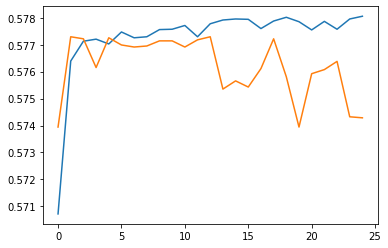

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
#plt.legend('train','test')

In [ ]:
# Restricted Boltzmann Machine
